In [511]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
df_sample = pd.read_csv("data/01_raw/en.openfoodfacts.org.products.tsv", sep="\t")
#df_sample = df.sample(n=10000, random_state=1)



/home/gio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [512]:
df.shape

(356027, 163)

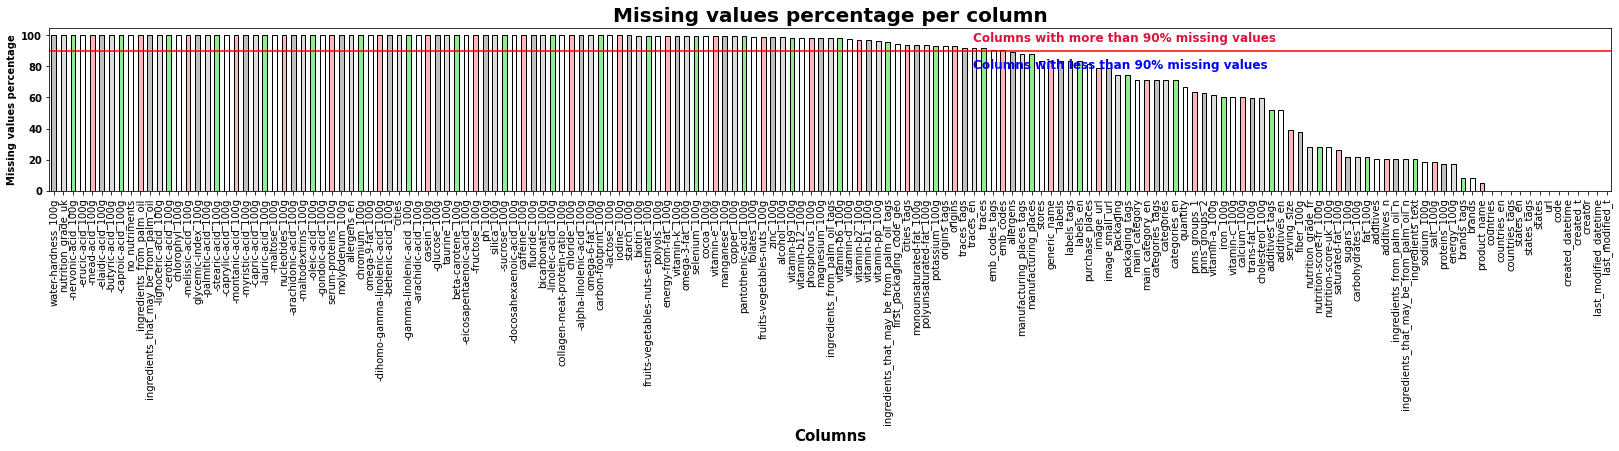

In [513]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df_sample,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'), width=28, height=3)


Retrait des colonnes 90% NA

In [514]:
df_0=df_sample.dropna(thresh=1000, axis=1)

Rajout d'une colonne faisant partie des 90% NA mais qui peut s'averer utile

In [515]:
df_0 = df_0.assign(ingredients_that_may_be_from_palm_oil_tags=df_sample["ingredients_that_may_be_from_palm_oil_tags"].values)

In [516]:
print("Echantillon de base      : {} lignes, {} colonnes.".format(df_sample.shape[0], df_sample.shape[1]))
print("Après retrait des 90% NA : {} lignes, {} colonnes.".format(df_0.shape[0], df_0.shape[1]))

Echantillon de base      : 356027 lignes, 163 colonnes.
Après retrait des 90% NA : 356027 lignes, 96 colonnes.


In [517]:
df_0.head()

code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... iron_100g magnesium_100g zinc_100g copper_100g  \
0          NaN      1kg  ...       NaN            NaN       NaN         NaN   
1          NaN      NaN  ...   0.00129            NaN       NaN         NaN   
2          NaN      NaN  ...   0.00129            NaN       NaN         NaN   
3          NaN      NaN  ...   0.00514            NaN       NaN         NaN   
4          NaN      NaN  ...       NaN            NaN       NaN         NaN   

  manganese_100g selenium_100g fruits-vegetables-nuts_100g cocoa_100g  \
0            NaN           NaN                         NaN        NaN   
1            NaN           NaN                         NaN        NaN   
2            NaN           NaN                         NaN        NaN   
3            NaN           NaN                         NaN        NaN   
4            NaN           NaN                         NaN        NaN   

  nutrition-score-fr_100g nutrition-score-uk_100g  
0                     NaN                     NaN  
1                    14.0                    14.0  
2                     0.0                     0.0  
3                    12.0                    12.0  
4                     NaN                     NaN  

[5 rows x 96 columns]

In [518]:
df_0 = df_0.drop([ 
    'url',
    'creator',
    'created_t',
    'created_datetime',
    'last_modified_t',
    'last_modified_datetime',
], axis=1)

In [519]:
df_0["countries"] = df_0["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x
)

In [520]:
df_1 = df_0[(df_0["countries"] == "France")]

print("Après séléctions lignes France: {} lignes, {} colonnes.".format(df_1.shape[0], df_1.shape[1]))

Après séléctions lignes France: 129323 lignes, 90 colonnes.


In [521]:
list(df_1.columns)

['code',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'mon

In [522]:
df_2 = df_1[
    [
        'product_name',
        'brands',
        'categories',
        'ingredients_text',
        'allergens',
        'nutrition_grade_fr',
        'energy_100g',
        'fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'fiber_100g',
        'proteins_100g',
        'salt_100g',
        'sodium_100g'
    ]
]

In [523]:
df_2 = df_2[~df_2.product_name.isna()]


In [524]:
list(df_2.columns)

['product_name',
 'brands',
 'categories',
 'ingredients_text',
 'allergens',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

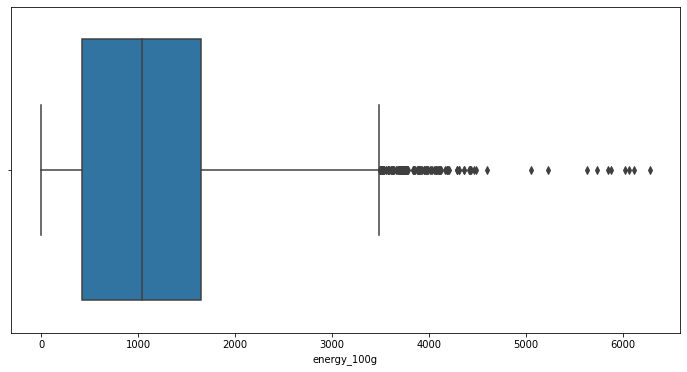

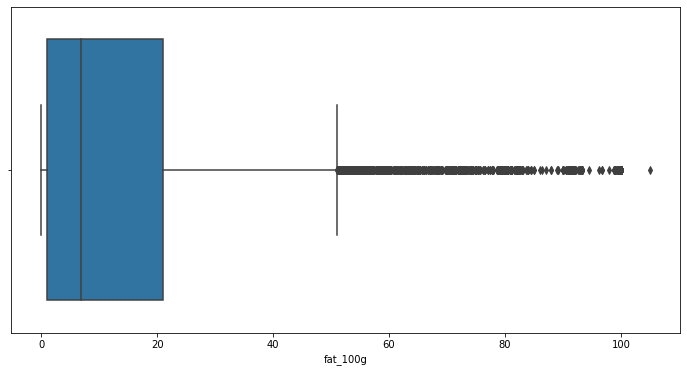

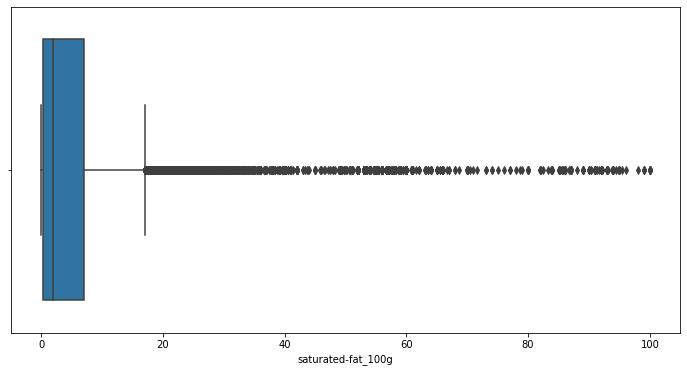

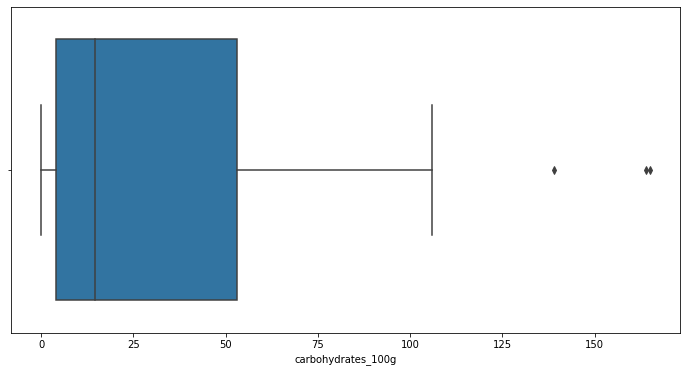

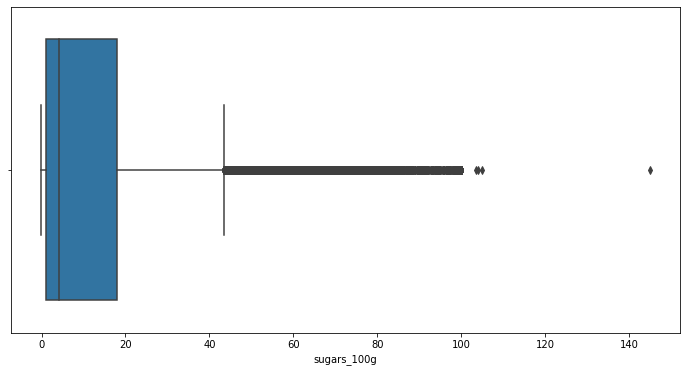

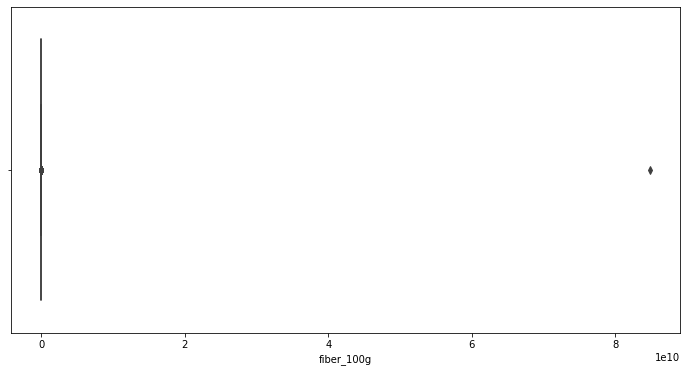

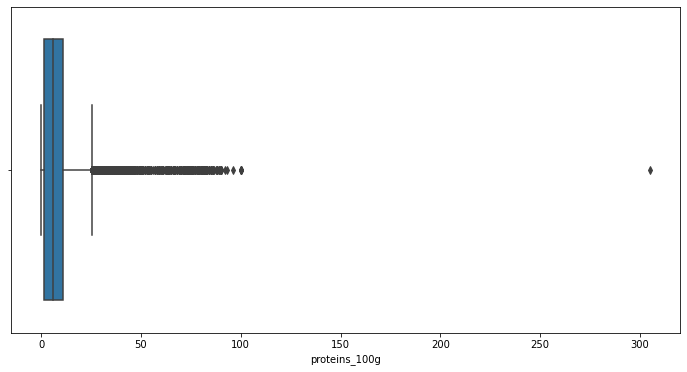

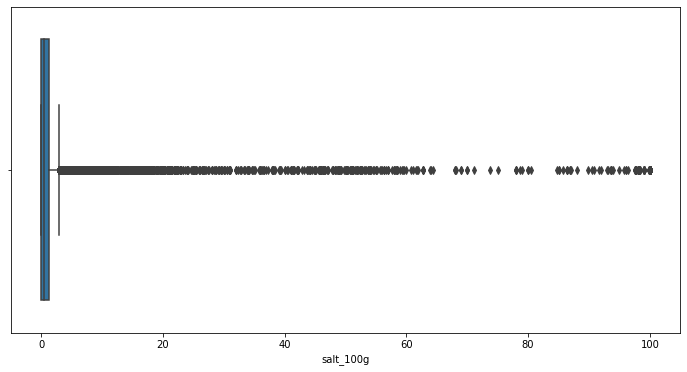

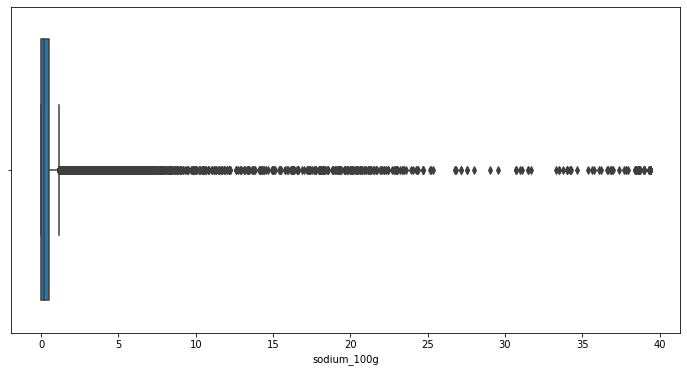

In [525]:
df_x = df_2[[
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]]

for i, col in enumerate(df_x.columns):
    plt.figure(i, figsize=(12,6))
    sns.boxplot(x=col, data=df_x)
    

In [505]:
df_2 = df_2[df_2["proteins_100g"] < 100]

In [506]:
df_2.sample(10)

product_name  \
270957           Pennes Bacon Parmesan Pousses D'epinards   
218084                                        Ratatouille   
302852                                        Miel Nectar   
257009  Carrés Gourmands Chocolat Noir Noisettes Entiè...   
238799                                          Sucralose   
201206                                   Thé Infusé Glacé   
27010                     Skinny Chocolate Muffin Dessert   
211015                             Pizza Giant 4 fromages   
259305                              Mini cakes aux fruits   
238222                           2 pavés de Cerf congelés   

                          brands  \
270957     Le Kiosque A Sandwich   
218084                    Auchan   
302852                  Delhaize   
257009                 Carrefour   
238799         Canderel,Merisant   
201206                    MayTea   
27010            Marks & Spencer   
211015                    Sodebo   
259305  P'tit Déli,Marque Repère   
238222                     Hubco   

                                               categories  \
270957                                                NaN   
218084                                                NaN   
302852                                              Miels   
257009  Snacks sucrés,Chocolats,Chocolats noirs,Chocol...   
238799  en:sweeteners, en:food-additives, en:sugar-sub...   
201206                                            boisson   
27010   Snacks sucrés,Produits laitiers,Desserts,Choco...   
211015  Plats préparés,Pizzas tartes salées et quiches...   
259305  Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...   
238222                       Viandes,Cerf,Viandes de Cerf   

                                         ingredients_text  \
270957  Pâtes à la crèrne, au bacon grillé et au Ingré...   
218084  ratatouille ingrédients Légumes 78% (courgette...   
302852                                                NaN   
257009  Sucre, pâte de cacao, _noisettes_ entières (25...   
238799  Dextrose, édulcorant : sucralose (1,44%), anti...   
201206  infusion de thé vers 94% (eau, infusion intens...   
27010                                                 NaN   
211015  garniture 60% (cheddar fondu 20% (cheddar, eau...   
259305  Fruits 30% (cubes de pastèque confits 13,5% (p...   
238222                                     Pavés de Cerf.   

                             allergens nutrition_grade_fr  energy_100g  \
270957                             NaN                  c       866.00   
218084                             NaN                  c       192.00   
302852                             NaN                  d      1339.00   
257009           noisettes, lait, soja                  e      2352.00   
238799                             NaN                  d      1506.00   
201206                             NaN                  d        83.00   
27010                              NaN                  b       586.00   
211015                             NaN                  d      1144.00   
259305  anhydride sulfureux, blé, œufs                  d      1571.00   
238222                             NaN                NaN       656.26   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
270957       8.7                4.40               24.40          2.2   
218084       1.3                0.10                6.30          4.7   
302852       NaN                0.00                 NaN         79.3   
257009      39.0               16.00               42.00         38.0   
238799       0.0                0.00               90.00         90.0   
201206       0.0                0.00                4.80          4.7   
27010        2.8                0.91               23.50         15.6   
211015      13.1                7.20               25.30          2.8   
259305      12.3                1.30               60.50         34.2   
238222       6.0                 NaN                0.95          NaN   

        fiber

In [507]:
cols =  [
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]
for col in cols:
    df_2[col] = df_2[col].fillna(0.0)

cols2 = [
    "categories",
    "ingredients_text",
    "allergens",
    "nutrition_grade_fr",
    "brands"
]
for col in cols2:
    df_2[col] = df_2[col].fillna("Non renseigné")

<AxesSubplot:>

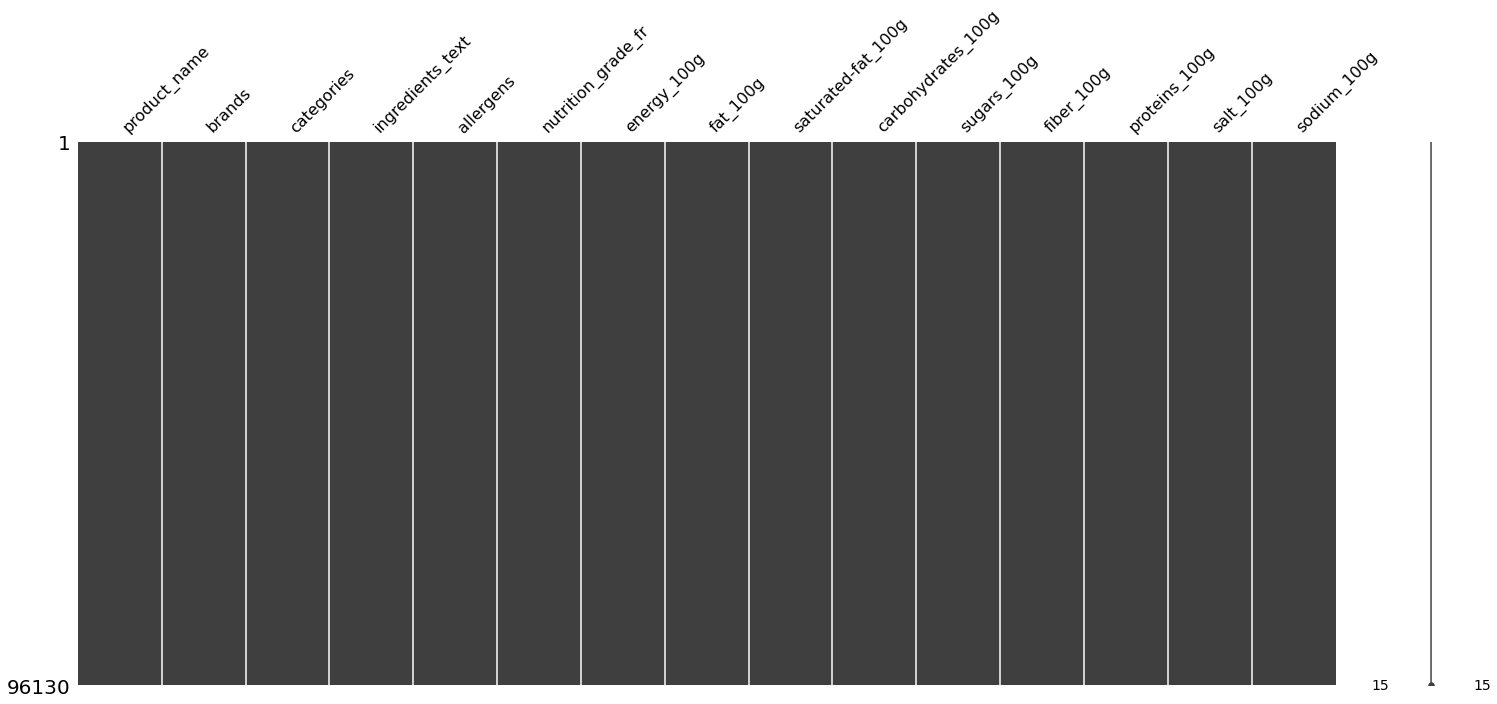

In [508]:
msno.matrix(df_2)

In [509]:
df_2["fiber_100g"].value_counts()

0.000     50376
0.500      2595
1.000      1794
3.000      1614
2.000      1576
          ...  
0.349         1
6.830         1
1.967         1
3.160         1
85.200        1
Name: fiber_100g, Length: 921, dtype: int64

In [510]:
df_2.to_csv("data/02_intermediate/openfoodfacts_df_2.csv")